# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [49]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc,average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis and Visualization

In [10]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [11]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [16]:
df["Class"].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

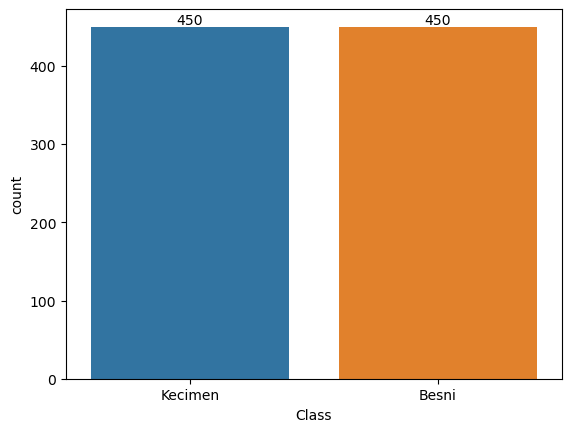

In [17]:
ax = sns.countplot(data = df, x = "Class")
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
# target değişken dengeli dağılmış  balans data

In [18]:
# Target değişkenine nümeric dönüşüm gerçekleştirelim
df["Class"] = df["Class"].map({"Kecimen": 0, "Besni": 1})

In [19]:
df.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
769,195281,609.829726,408.535619,0.742436,197426,0.769656,1639.103,1
69,71595,387.309695,236.751185,0.791421,74045,0.718537,1069.770,0
164,71452,397.961427,239.798780,0.798068,73864,0.751833,1101.502,0
342,57612,352.441365,210.064210,0.802965,58810,0.647719,934.684,0
347,61967,364.784018,218.566173,0.800625,63724,0.687300,981.059,0


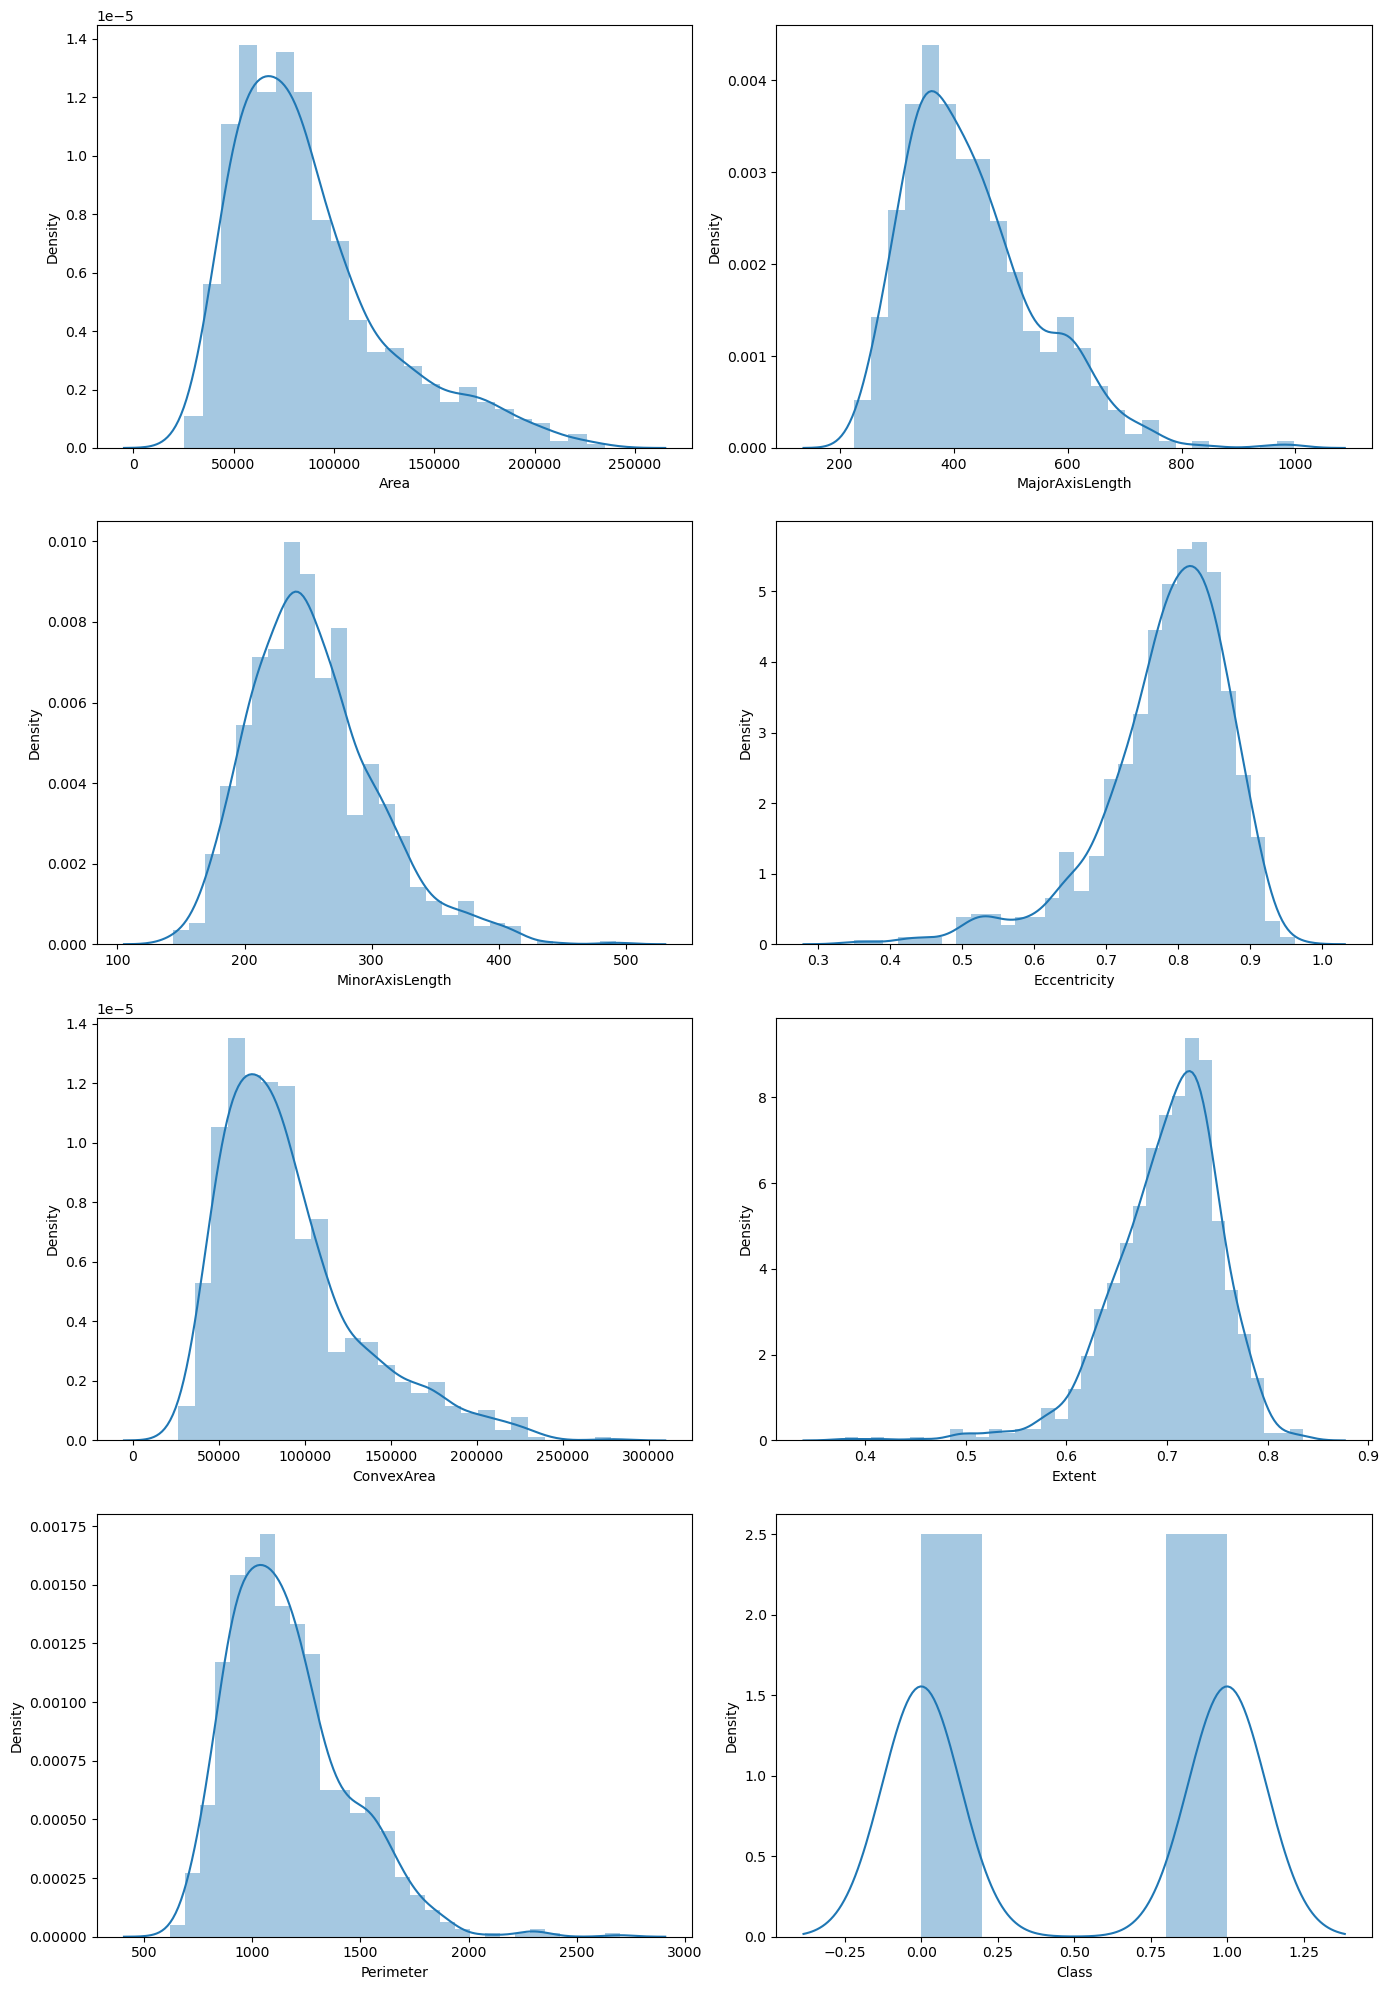

In [20]:
plt.figure(figsize = (14, 20))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(4, 2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

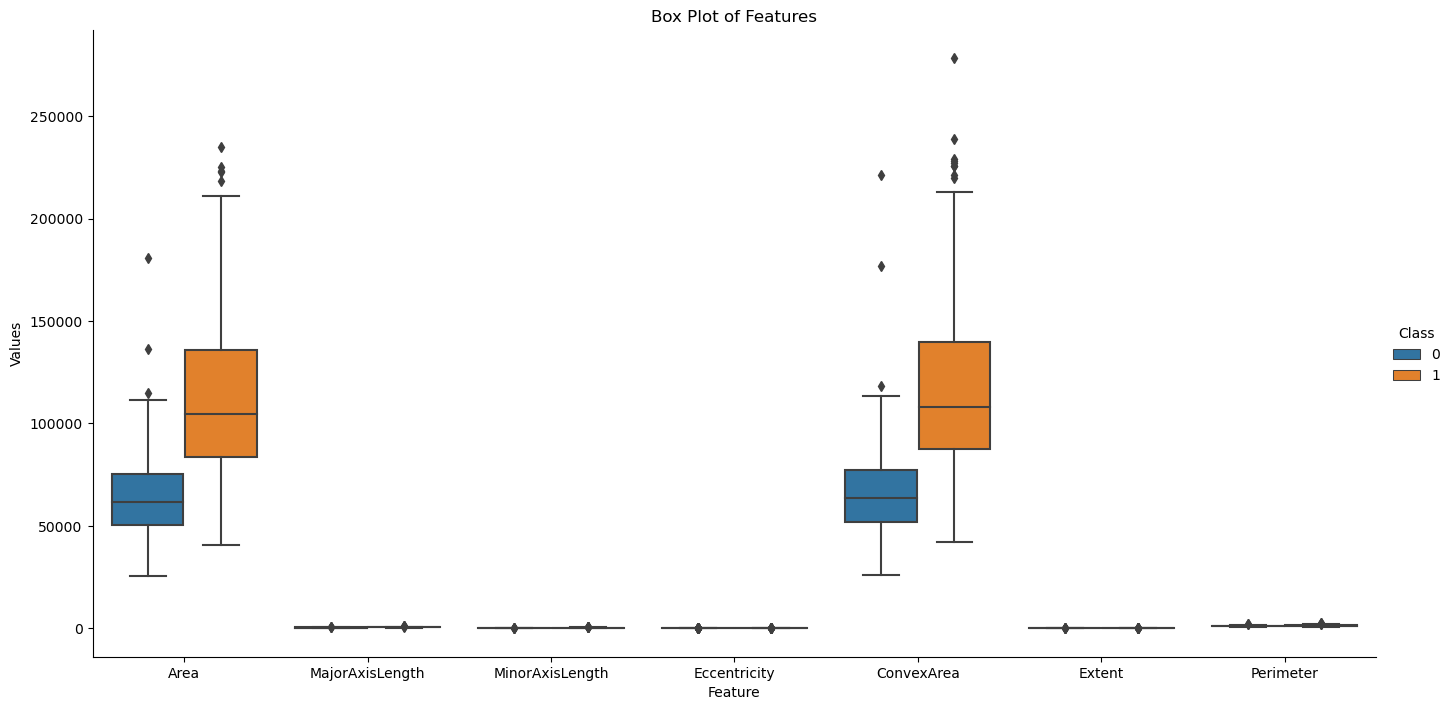

In [21]:
# pd.melt() fonksiyonu, geniş formatlı bir veri çerçevesini uzun formatlı bir veri çerçevesine dönüştürmek için kullanılır
# Yani Sütunları arda arda tek bir dataframe de topluyoruz 
data_to_plot = df.melt(id_vars='Class', value_vars=df.columns[:-1])

# Boxplot 1. yol 
sns.catplot(data=data_to_plot, x="variable", y="value", hue="Class", kind="box", height=7, aspect=2)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Features')

# Display the plot
plt.show()

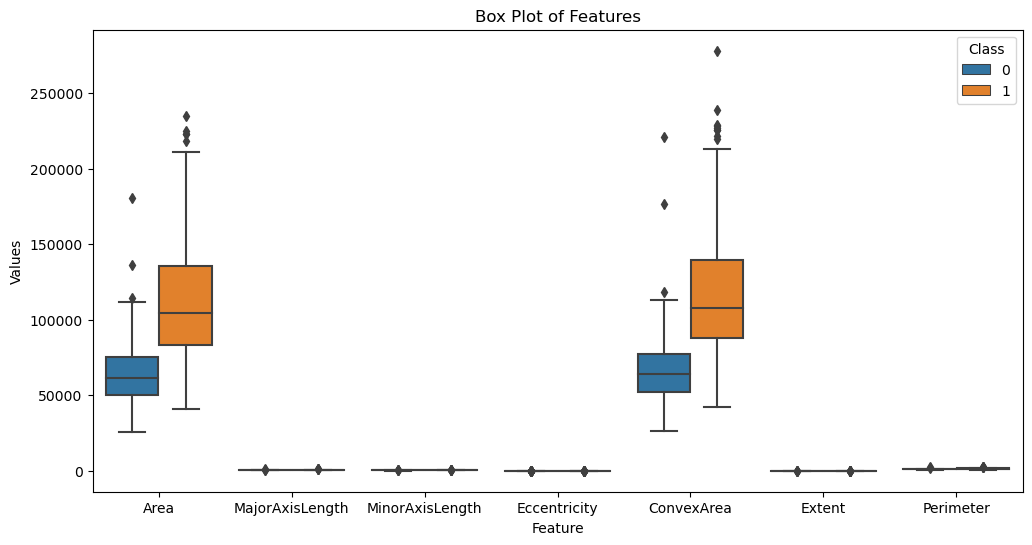

In [22]:
# Boxplot 2. yol 
plt.figure(figsize = (12,6))
sns.boxplot(x = "variable", y = "value", hue = "Class", data= data_to_plot)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Features')
plt.show()

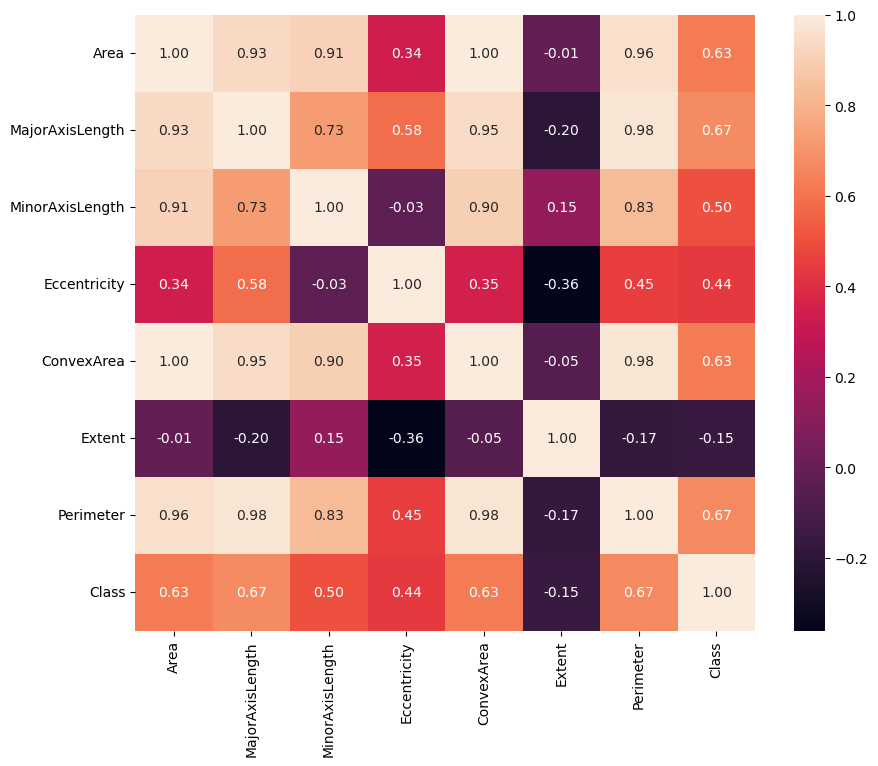

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes('number').corr(), annot = True, fmt = '.2f')
plt.show()

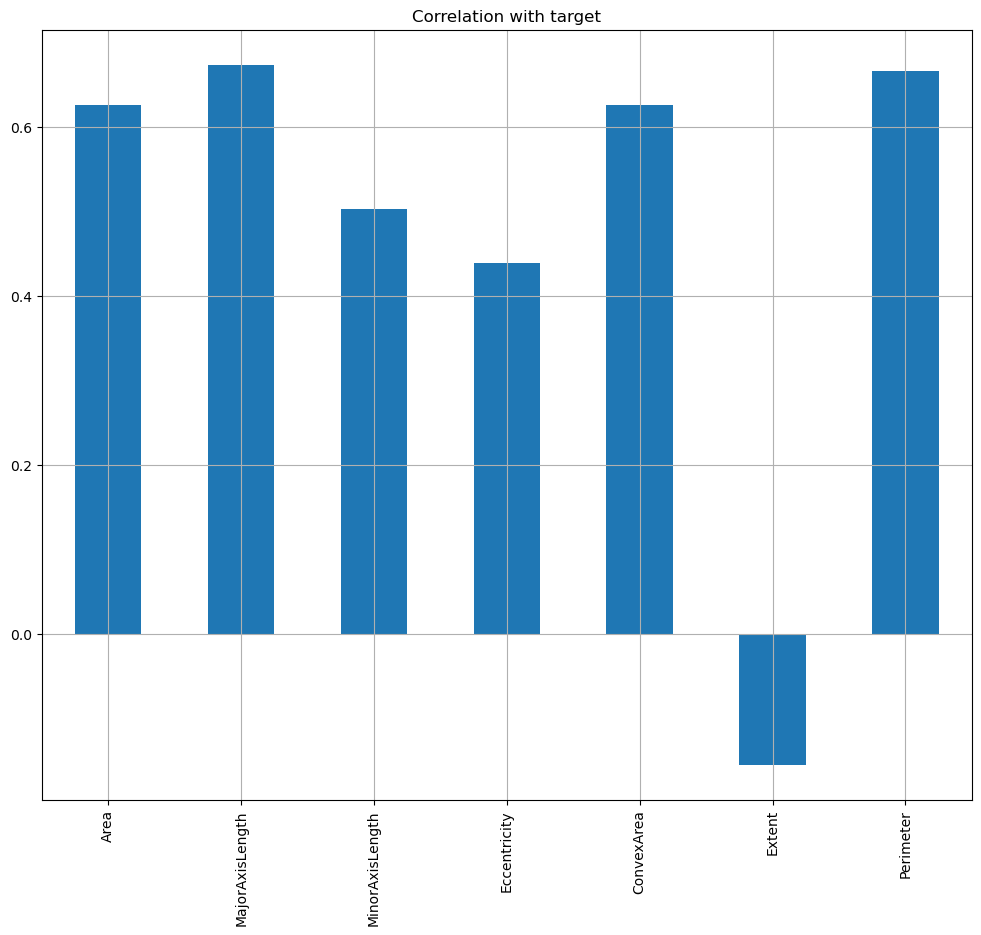

In [24]:
# Correlation with target
df.drop('Class', axis=1).corrwith(df.Class).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target");

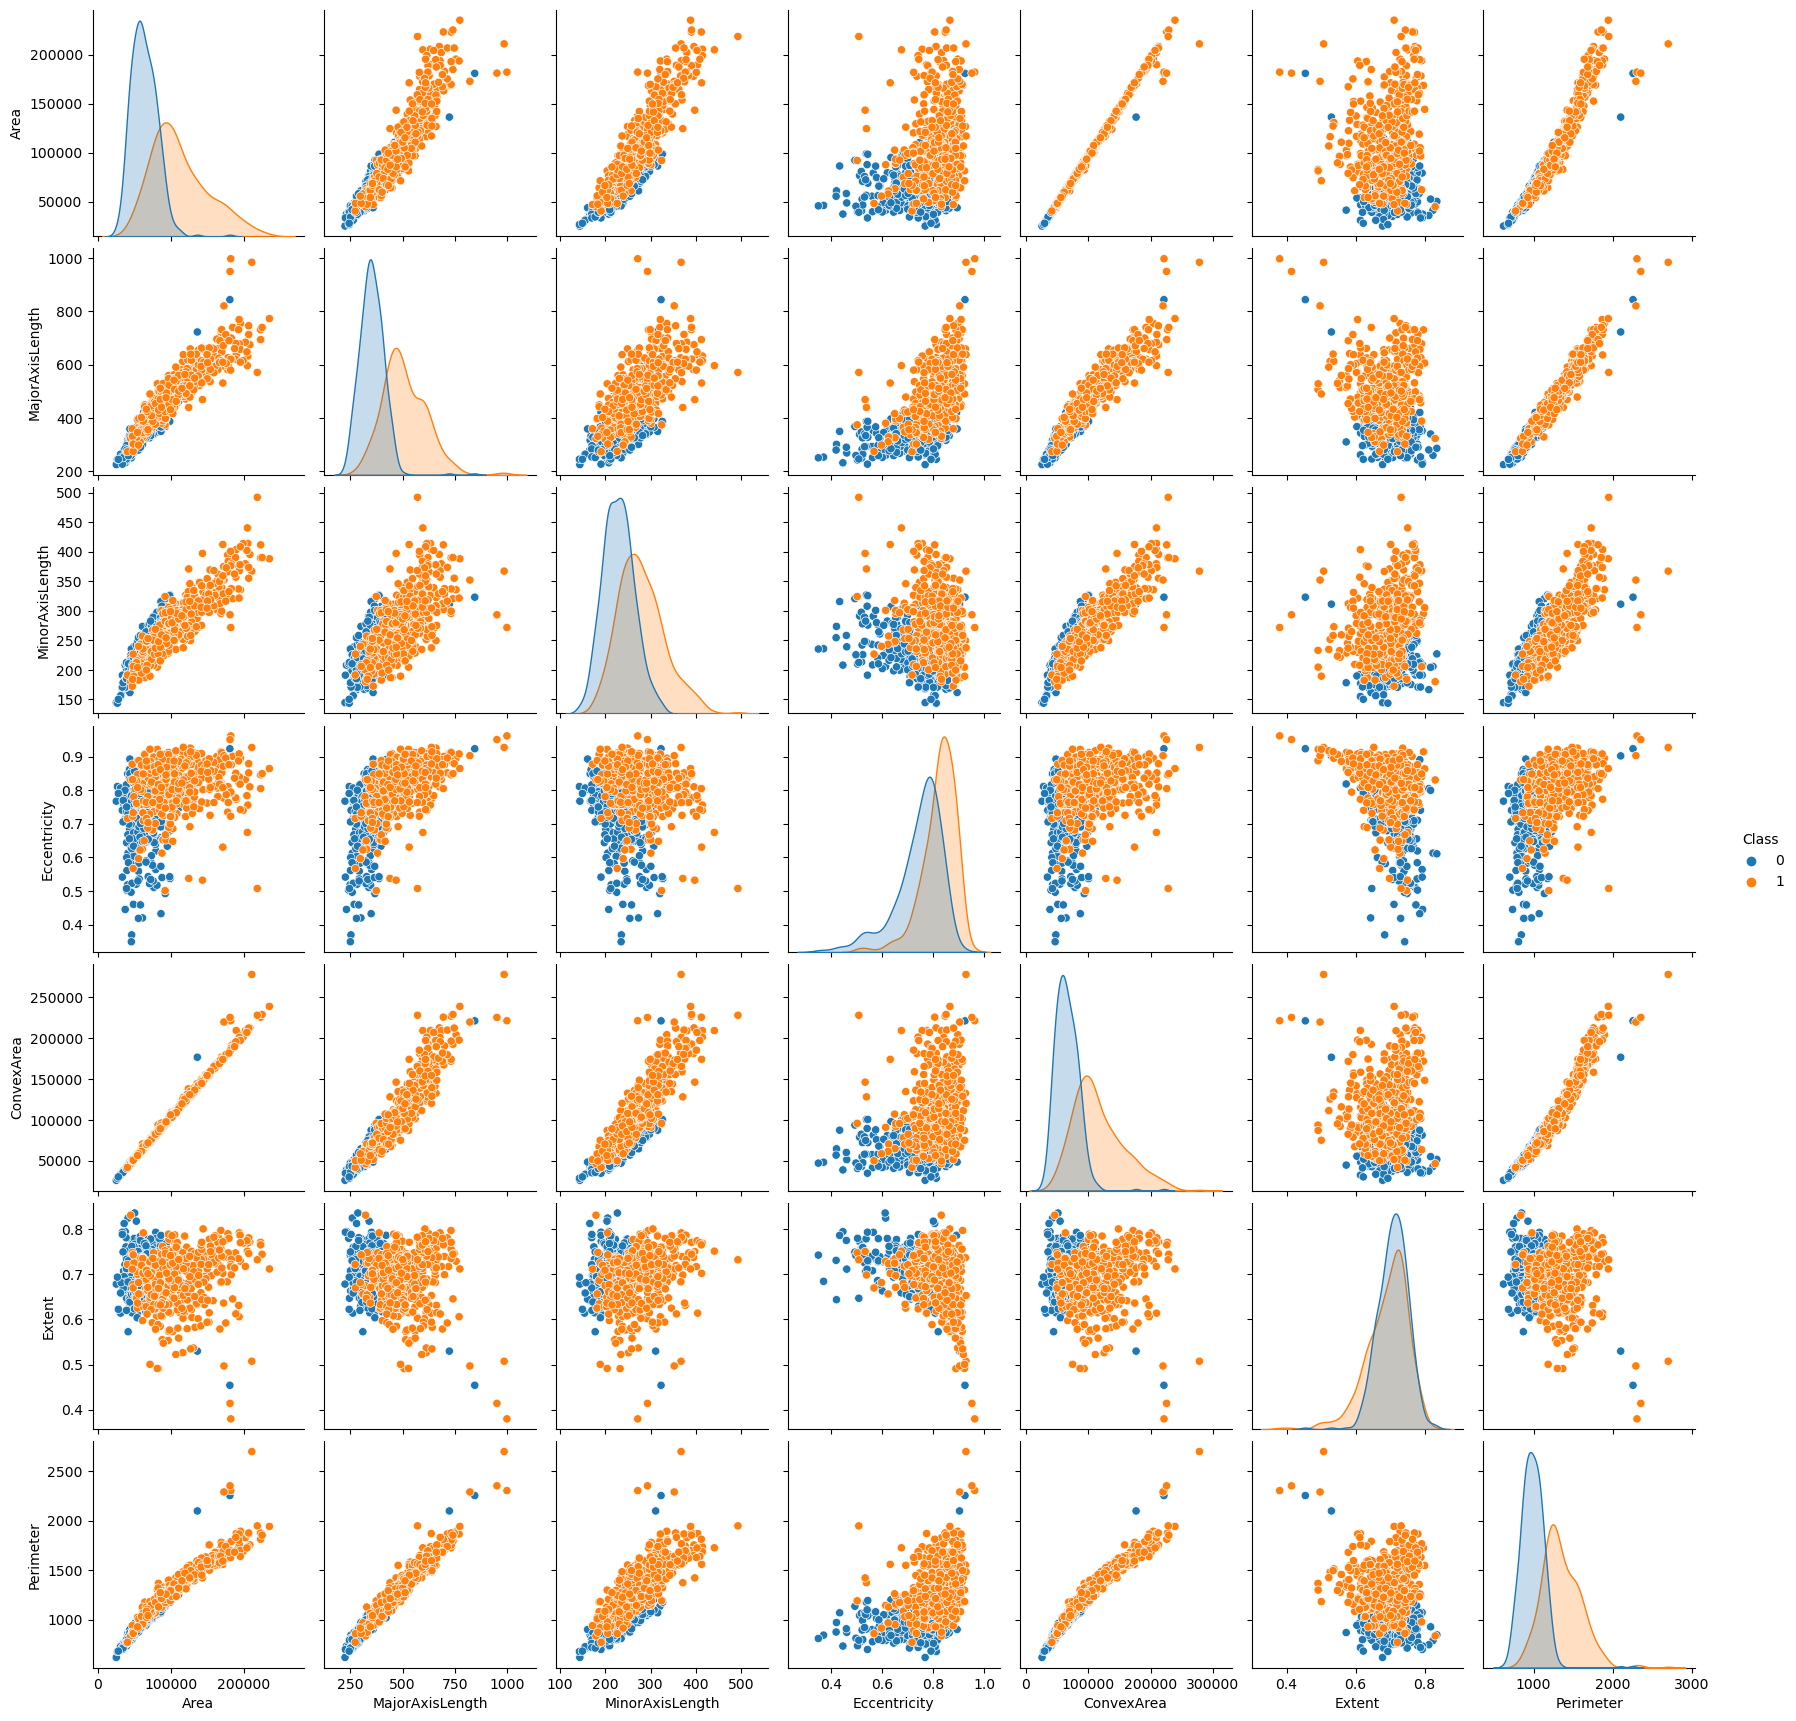

In [25]:
sns.pairplot(df, hue = "Class")
plt.show()

In [26]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

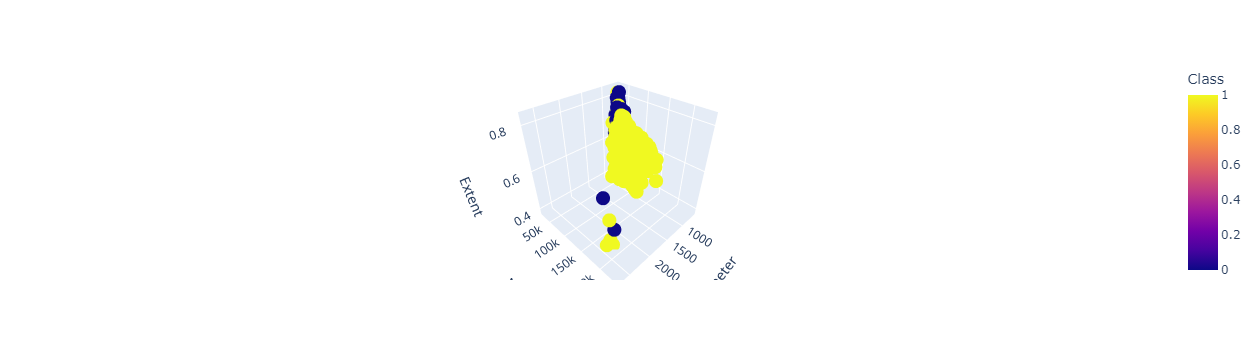

In [27]:
fig = px.scatter_3d(df, x = 'Perimeter', y = 'Area', z = 'Extent', color = 'Class')
fig.show()

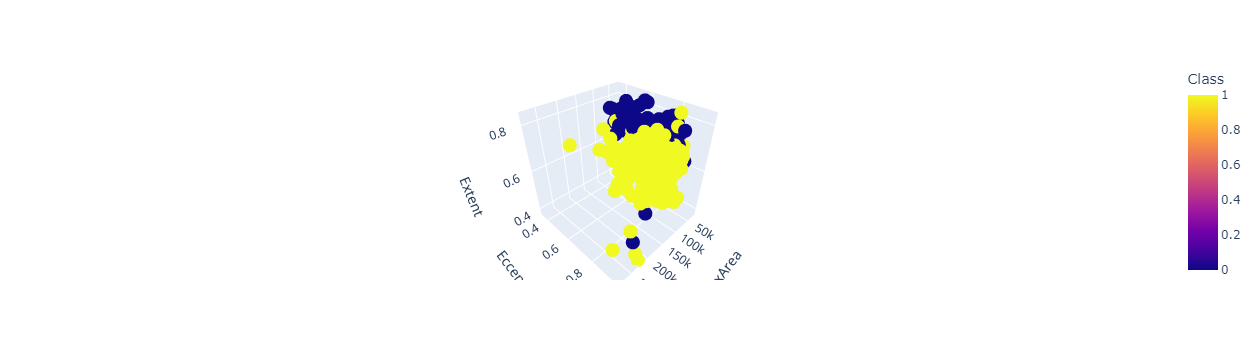

In [29]:
fig = px.scatter_3d(df, x = 'ConvexArea', y = 'Eccentricity', z = 'Extent', color = 'Class')
fig.show()

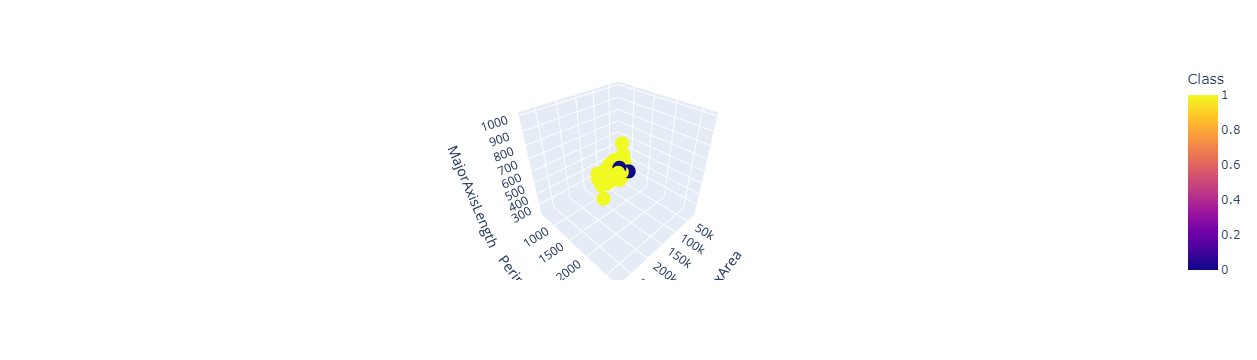

In [30]:
fig = px.scatter_3d(df, x = 'ConvexArea', y = 'Perimeter', z = 'MajorAxisLength', color = 'Class')
fig.show()

* Yukarıda ki 3 boyutlu grafikleri çizdirirken sütun seçiminde kendi aralarında daha az korelasyon olarlar seçilirse grafikten target değişkenin ayrımı daha net görülüyor
* Tam tersi bir durumda sütunlar arasında ilişki yüksek olduğundan target sınıfları daha iç içe geçmiş olduğu görülüyor

## Train | Test Split and Scaling

In [31]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [35]:
log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
log_model.coef_

array([[ 0.5678749 ,  0.59122611, -0.31700958,  0.34566075,  0.19538649,
        -0.1849446 ,  1.86544582]])

In [37]:
log_model.intercept_

array([0.49466751])

In [38]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=int64)

In [39]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[2.22157960e-01, 7.77842040e-01],
       [7.74543311e-01, 2.25456689e-01],
       [9.79285985e-01, 2.07140146e-02],
       [4.09276516e-02, 9.59072348e-01],
       [9.77954101e-01, 2.20458987e-02],
       [5.23182279e-01, 4.76817721e-01],
       [9.84306279e-01, 1.56937214e-02],
       [4.84006429e-01, 5.15993571e-01],
       [6.58668959e-01, 3.41331041e-01],
       [6.59239576e-01, 3.40760424e-01],
       [2.69468226e-01, 7.30531774e-01],
       [2.66991123e-02, 9.73300888e-01],
       [1.17615739e-02, 9.88238426e-01],
       [8.01421846e-01, 1.98578154e-01],
       [1.58056261e-03, 9.98419437e-01],
       [6.27185549e-03, 9.93728145e-01],
       [3.58222737e-01, 6.41777263e-01],
       [9.89509092e-01, 1.04909078e-02],
       [6.25415356e-01, 3.74584644e-01],
       [2.94181954e-01, 7.05818046e-01],
       [8.31084652e-01, 1.68915348e-01],
       [6.25411498e-03, 9.93745885e-01],
       [9.21123809e-01, 7.88761906e-02],
       [8.92096578e-01, 1.07903422e-01],
       [9.625141

In [40]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
70,95347,451.526154,280.226153,0.784111,99256,0.674956,1255.245,0
827,61861,345.943650,235.430468,0.732706,67390,0.702280,1063.621,1
231,52693,283.504239,242.113954,0.520265,54860,0.737749,895.745,0
588,112808,542.504780,267.201878,0.870293,116961,0.743155,1390.400,1
39,49882,287.264327,222.185873,0.633852,50880,0.766378,843.764,0
...,...,...,...,...,...,...,...,...
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
578,129038,540.814829,306.817764,0.823494,134796,0.648758,1459.345,1
779,103915,516.485501,260.105445,0.863933,106499,0.691085,1285.063,1
25,75620,368.224284,263.459255,0.698627,77493,0.726277,1059.186,0


In [41]:
# Burada 0.5 ve üzerindeki olasılıkları 1 classına,
#        0.5 ve altındakileri de 0 classına atar.

test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba
70,95347,451.526154,280.226153,0.784111,99256,0.674956,1255.245,0,0.777842
827,61861,345.943650,235.430468,0.732706,67390,0.702280,1063.621,1,0.225457
231,52693,283.504239,242.113954,0.520265,54860,0.737749,895.745,0,0.020714
588,112808,542.504780,267.201878,0.870293,116961,0.743155,1390.400,1,0.959072
39,49882,287.264327,222.185873,0.633852,50880,0.766378,843.764,0,0.022046
...,...,...,...,...,...,...,...,...,...
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1,0.716768
578,129038,540.814829,306.817764,0.823494,134796,0.648758,1459.345,1,0.978708
779,103915,516.485501,260.105445,0.863933,106499,0.691085,1285.063,1,0.910531
25,75620,368.224284,263.459255,0.698627,77493,0.726277,1059.186,0,0.215947


In [42]:
test_data["pred"] = y_pred
test_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,pred_proba,pred
70,95347,451.526154,280.226153,0.784111,99256,0.674956,1255.245,0,0.777842,1
827,61861,345.943650,235.430468,0.732706,67390,0.702280,1063.621,1,0.225457,0
231,52693,283.504239,242.113954,0.520265,54860,0.737749,895.745,0,0.020714,0
588,112808,542.504780,267.201878,0.870293,116961,0.743155,1390.400,1,0.959072,1
39,49882,287.264327,222.185873,0.633852,50880,0.766378,843.764,0,0.022046,0
...,...,...,...,...,...,...,...,...,...,...
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1,0.716768,1
578,129038,540.814829,306.817764,0.823494,134796,0.648758,1459.345,1,0.978708,1
779,103915,516.485501,260.105445,0.863933,106499,0.691085,1285.063,1,0.910531,1
25,75620,368.224284,263.459255,0.698627,77493,0.726277,1059.186,0,0.215947,0


In [43]:
# 0-1 sınıflarını kaçta kaç bulmuş:

test_data.groupby("Class")[["pred"]].value_counts(normalize = True)

Class  pred
0      0       0.840426
       1       0.159574
1      1       0.872093
       0       0.127907
Name: proportion, dtype: float64

## Model Performance

In [44]:
accuracy_score(y_test,y_pred)

0.8555555555555555

In [51]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[79, 15],
       [11, 75]], dtype=int64)

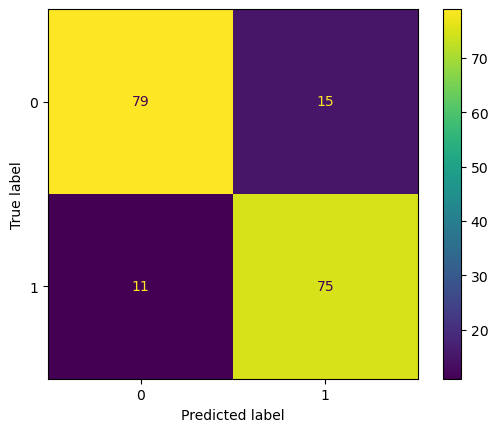

In [55]:
disp = ConfusionMatrixDisplay(cm, display_labels=None)
disp.plot()

In [56]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [57]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test) 

Test_Set
[[79 15]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[317  39]
 [ 56 308]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       356
           1       0.89      0.85      0.87       364

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



### Cross Validate

In [58]:
model = LogisticRegression()
scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.007818,0.010551,0.847222,0.820513,0.888889,0.853333
2,0.005999,0.012634,0.875000,0.935484,0.805556,0.865672
3,0.008241,0.012905,0.819444,0.810811,0.833333,0.821918
4,0.007371,0.046530,0.944444,0.970588,0.916667,0.942857
5,0.071753,0.013362,0.861111,0.906250,0.805556,0.852941
6,0.023111,0.028694,0.888889,0.868421,0.916667,0.891892
7,0.041264,0.015308,0.777778,0.818182,0.729730,0.771429
8,0.010126,0.016630,0.833333,0.878788,0.783784,0.828571
9,0.011012,0.013901,0.930556,0.921053,0.945946,0.933333
10,0.014857,0.015409,0.902778,0.968750,0.837838,0.898551


In [59]:
df_scores.mean()[2:]

test_accuracy     0.868056
test_precision    0.889884
test_recall       0.846396
test_f1           0.866050
dtype: float64

### GridSearchCV

In [60]:
model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) 
class_weight= ["balanced", None] 
solver = ["liblinear"] 

param_grid = {"penalty": penalty,
              "C": [1],
              "class_weight": class_weight,
              "solver": solver} 

grid_model = GridSearchCV(estimator = model,
                          param_grid = param_grid,
                          cv = 10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1], 'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [61]:
grid_model.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}

In [62]:
grid_model.best_index_

0

In [63]:
grid_model.best_score_

0.8680555555555556

In [67]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=int64)

In [68]:
cm_grid = confusion_matrix(y_test, y_pred)
cm_grid

array([[79, 15],
       [11, 75]], dtype=int64)

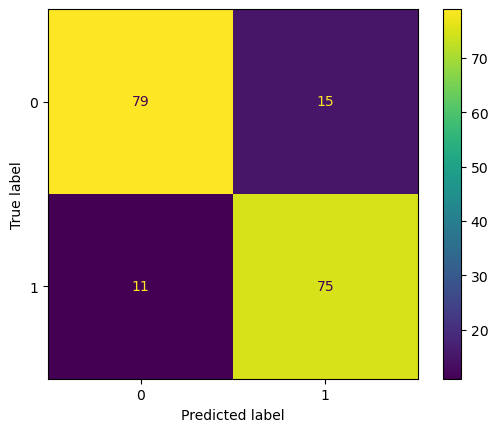

In [69]:
disp = ConfusionMatrixDisplay(cm_grid, display_labels=None)
disp.plot()

In [66]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[79 15]
 [11 75]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        94
           1       0.83      0.87      0.85        86

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[317  39]
 [ 55 309]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       356
           1       0.89      0.85      0.87       364

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

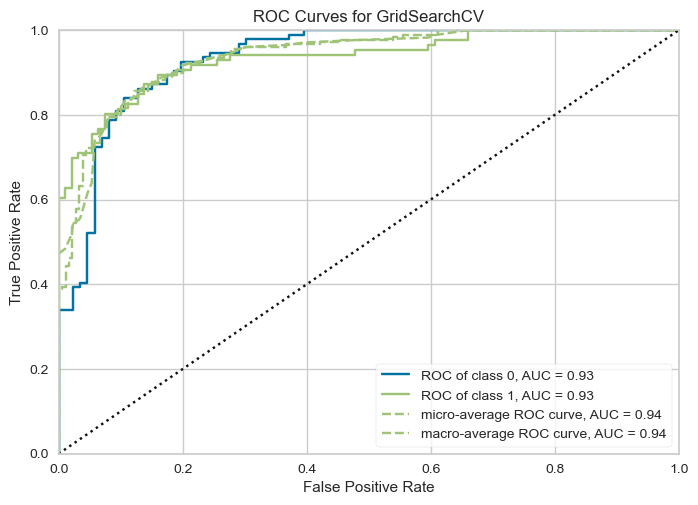

In [73]:
# Alternatif ROC gösterimi (yellowbrick)
from yellowbrick.classifier import ROCAUC

model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

In [71]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9307273626917367

# Conclusion 

## Final Base Model

In [56]:
scaler = StandardScaler().fit(X) #bütün datayı scale yapıyorum

In [57]:
import pickle
pickle.dump(scaler, open("scaler_raisin", 'wb')) #scale modelimi kayıt ediyorum

In [58]:
X_scaled_raisin = scaler.transform(X) #sonra transform yapıyorum

In [59]:
final_model = LogisticRegression().fit(X_scaled_raisin, y)#final modelimi oluşturuyorum

In [60]:
pickle.dump(final_model, open("final_model_raisin", 'wb'))#onuda kayıt ediyorum

## Pipeline Base Model

In [48]:
from sklearn.pipeline import Pipeline

scaler = StandardScaler()

In [49]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression())]

In [50]:
pipe_model = Pipeline(steps=operations)

In [51]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [52]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0], dtype=int64)

### Changing the parameters of the pipeline model

In [53]:
pipe_model.get_params() 

# pipeline içerisindeki hiper-parametreleri getirir

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [54]:
pipe_model.set_params(logistic__penalty = "l1")

# Yukarıdaki listeden ihtiyaç duyulan parametre değişikliği yapar.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(penalty='l1'))])

## GridSearch & Pipeline

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
param_grid = {
    "logistic__solver": ['liblinear'],
    "logistic__penalty": penalty,
     "logistic__C" : C
}

In [58]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression())]

In [59]:
pipe_model = Pipeline(steps=operations)

In [60]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= "accuracy")

In [61]:
pipe_grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear']},
             scoring='accuracy')

In [62]:
pipe_grid.best_params_

{'logistic__C': 0.8858667904100825,
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [63]:
pipe_grid.best_score_ # accuracy

0.8680555555555556

## Pipeline Final Model

In [64]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression(C = 0.8858667904100825,
                                             penalty = 'l1',
                                             solver = 'liblinear'))]

# LogisticRegression içindeki hyperparametreleri pipe_grid.best_params_'dan aldık.

In [65]:
pipe_final = Pipeline(operations)

In [66]:
pipe_final.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.8858667904100825, penalty='l1',
                                    solver='liblinear'))])